**ADS ANALALYS**

***QUESTION 1***

If you had to identify the 5 best ad groups, which ones would they be? Which metric did you choose to identify the best ad groups? Why? Explain the pros of your metric as well as the possible cons

***QUESTION 2***

For each group, predict how many ads will be shown on Dec, 15 (assume each ad group keeps following its trend).

***QUESTION 3***

Cluster ads into 3 groups: the ones whose avg_cost_per_click is going up, the ones whose avg_cost_per_click is flat and the ones whose avg_cost_per_click is going down.

***Installing packages***

In [1]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

***Loading Dataset***

In [6]:
df=pd.read_csv("C:/Users/davja/Downloads/ad_table.csv")
df.head()

,date,shown,clicked,converted,avg_cost_per_click,total_revenue,ad
0,10/1/15,65877,2339,43,0.90,641.62,ad_group_1
1,10/2/15,65100,2498,38,0.94,756.37,ad_group_1
2,10/3/15,70658,2313,49,0.86,970.90,ad_group_1
3,10/4/15,69809,2833,51,1.01,907.39,ad_group_1
4,10/5/15,68186,2696,41,1.00,879.45,ad_group_1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2115 entries, 0 to 2114
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                2115 non-null   object 
 1   shown               2115 non-null   int64  
 2   clicked             2115 non-null   int64  
 3   converted           2115 non-null   int64  
 4   avg_cost_per_click  2115 non-null   float64
 5   total_revenue       2115 non-null   float64
 6   ad                  2115 non-null   object 
dtypes: float64(2), int64(3), object(2)
memory usage: 115.8+ KB


In [8]:
df.describe()

,shown,clicked,converted,avg_cost_per_click,total_revenue
count,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000
mean,68299.844444,3056.077069,126.453901,1.373749,1966.517589
std,48884.821409,3783.579969,233.420826,0.754331,3942.018757
min,0.000000,0.000000,0.000000,0.000000,-200.150000
25%,28030.500000,744.000000,18.000000,0.760000,235.470000
50%,54029.000000,1392.000000,41.000000,1.400000,553.300000
75%,97314.500000,3366.500000,103.000000,1.920000,1611.495000
max,192507.000000,20848.000000,1578.000000,4.190000,39623.710000


***Q1***

<span style="color: red;">To identify the best ads, a variety of metrics can be used  such as the average click-through-rate, or the average conversion-rate. Here, since the dataset provides the total revnue and cost info, we will simply use the net profit per shown ad (or unit profit) to find the 5 best ad groups</span>

In [17]:
# Calculating profit a following equation: 
df['profit'] = df['total_revenue']-df['avg_cost_per_click']*df['clicked']
df.head()

,date,shown,clicked,converted,avg_cost_per_click,total_revenue,ad,profit
0,10/1/15,65877,2339,43,0.90,641.62,ad_group_1,-1463.48
1,10/2/15,65100,2498,38,0.94,756.37,ad_group_1,-1591.75
2,10/3/15,70658,2313,49,0.86,970.90,ad_group_1,-1018.28
3,10/4/15,69809,2833,51,1.01,907.39,ad_group_1,-1953.94
4,10/5/15,68186,2696,41,1.00,879.45,ad_group_1,-1816.55


In [28]:
def profit_per_unit(df):
    profit = df['profit'].sum()
    shown = df['shown'].sum()
    value = profit/shown
    return value

group = df.groupby('ad').apply(profit_per_unit).reset_index()
group = group.rename(columns={0: 'profit per unit'})
group = group.sort_values(by='profit per unit', ascending=False)
group.head(5)

,ad,profit per unit
7,ad_group_16,0.020516
11,ad_group_2,0.020116
5,ad_group_14,0.016485
24,ad_group_31,0.005824
19,ad_group_27,0.000725


***Q2***

*For each group, predict how many ads will be shown on Dec, 15 (assume each ad group keeps following its trend)*

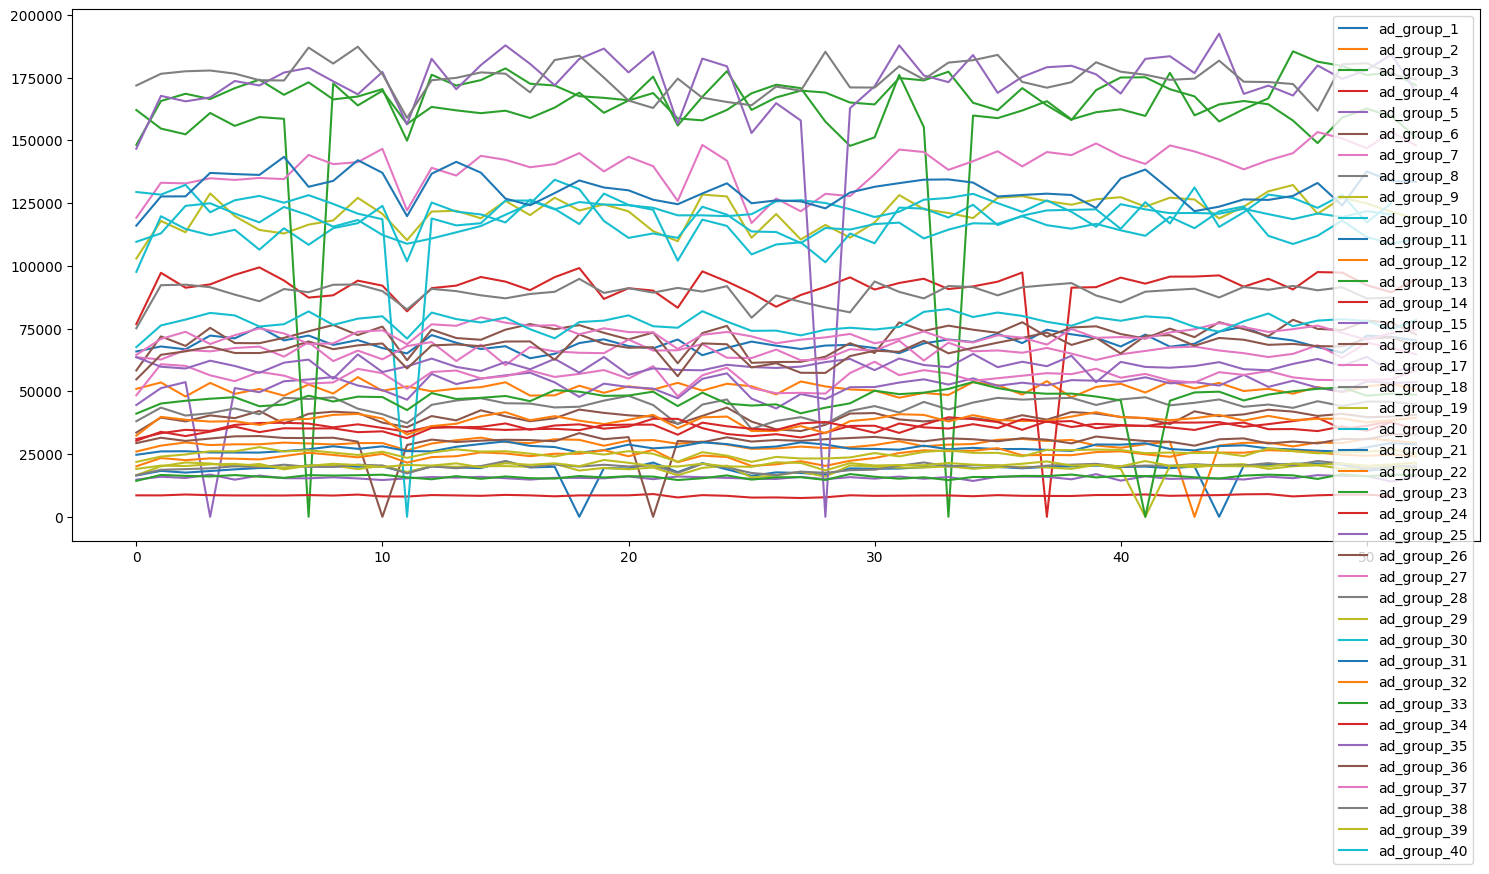

In [39]:
# visualization
fig, ax = plt.subplots(figsize=(15, 8))
for i in range(1, 41):
    ad_group = 'ad_group_' + str(i)
    vals = df[df['ad'] == ad_group].sort_values(by='date')['shown'].values
    ax.plot(vals, label=ad_group)
ax.legend()
plt.tight_layout()
plt.show()
    

***Q3***

*Cluster ads into 3 groups: the ones whose avg_cost_per_click is going up, the ones whose avg_cost_per_click is flat and the ones whose avg_cost_per_click is going down*

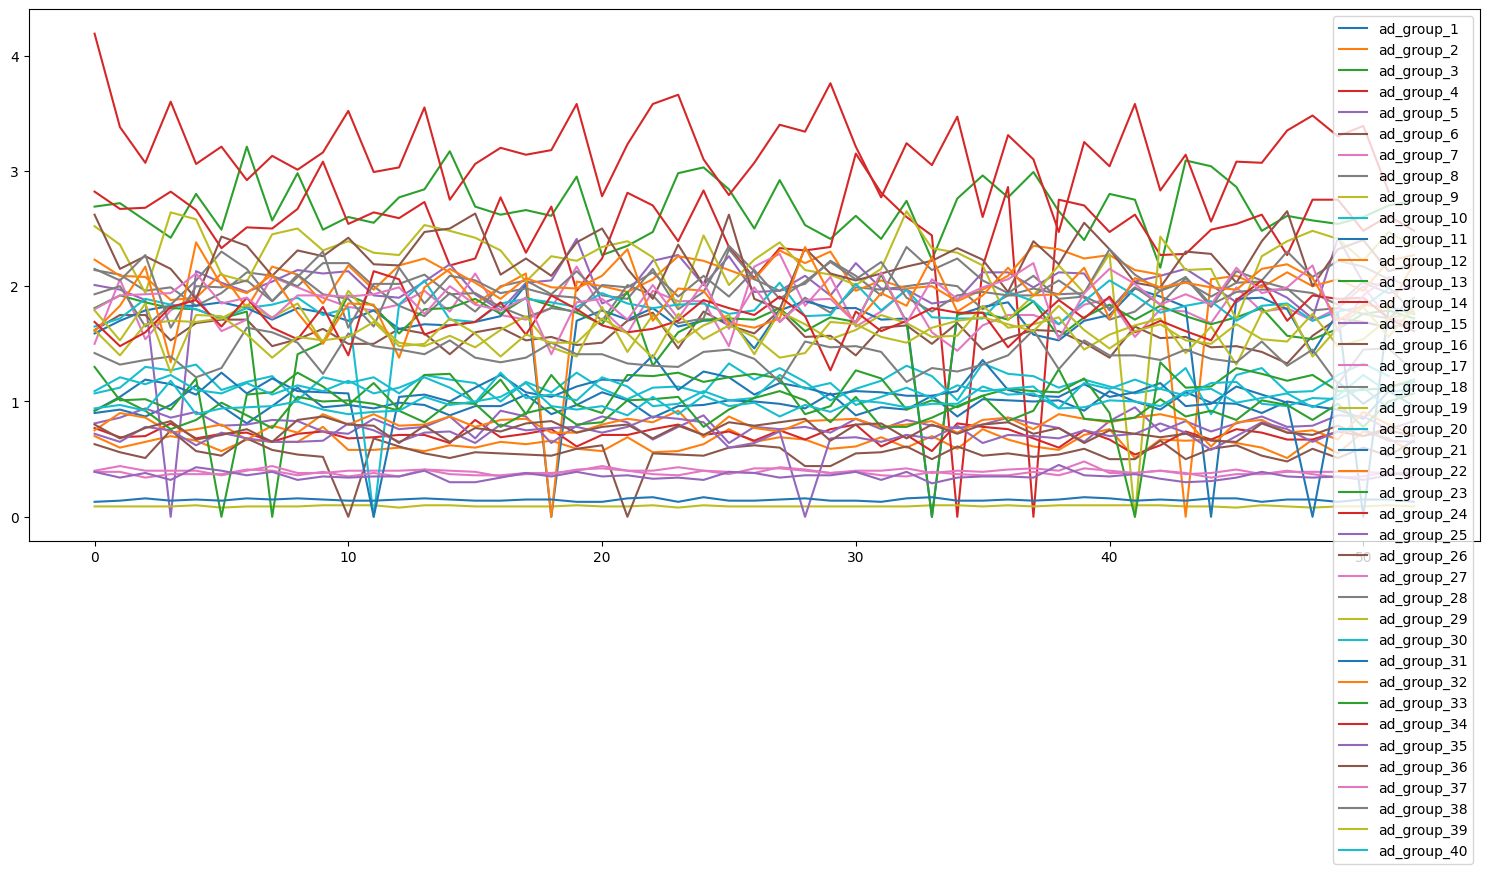

In [41]:
#VIZ
fig, ax = plt.subplots(figsize=(15, 8))
for i in range(1, 41):
    ad_group = 'ad_group_' + str(i)
    vals = df[df['ad'] == ad_group].sort_values(by='date')['avg_cost_per_click'].values
    ax.plot(vals, label=ad_group)
ax.legend()
plt.tight_layout()
plt.show()

In [42]:
def cost_stats(df):
    """ function to calculate the avg_cost_per_click trend """
    tmp = df.sort_values(by='date')['avg_cost_per_click'].values
    ratio = tmp[1:] / tmp[:-1]
    
    ratio_mean = np.mean(ratio)
    ratio_min = np.min(ratio)
    ratio_25 = np.percentile(ratio, 25)
    ratio_50 = np.percentile(ratio, 50)
    ratio_75 = np.percentile(ratio, 75)
    ratio_max = np.max(ratio)
    
    return pd.Series([ratio_mean, ratio_min, ratio_25, ratio_50, ratio_75, ratio_max], 
                     index=['mean', 'min', '25%', '50%', '75%', 'max'])

stats = df.groupby('ad').apply(cost_stats)
stats.head()

,mean,min,25%,50%,75%,max
ad,,,,,,
ad_group_1,1.007364,0.822430,0.918133,0.990099,1.105903,1.282353
ad_group_10,1.011133,0.689922,0.918476,1.008929,1.091036,1.382022
ad_group_11,inf,0.000000,0.954700,1.005865,1.052941,inf
ad_group_12,inf,0.000000,0.950199,0.991225,1.060455,inf
ad_group_13,inf,0.000000,0.954948,1.005619,1.070362,inf


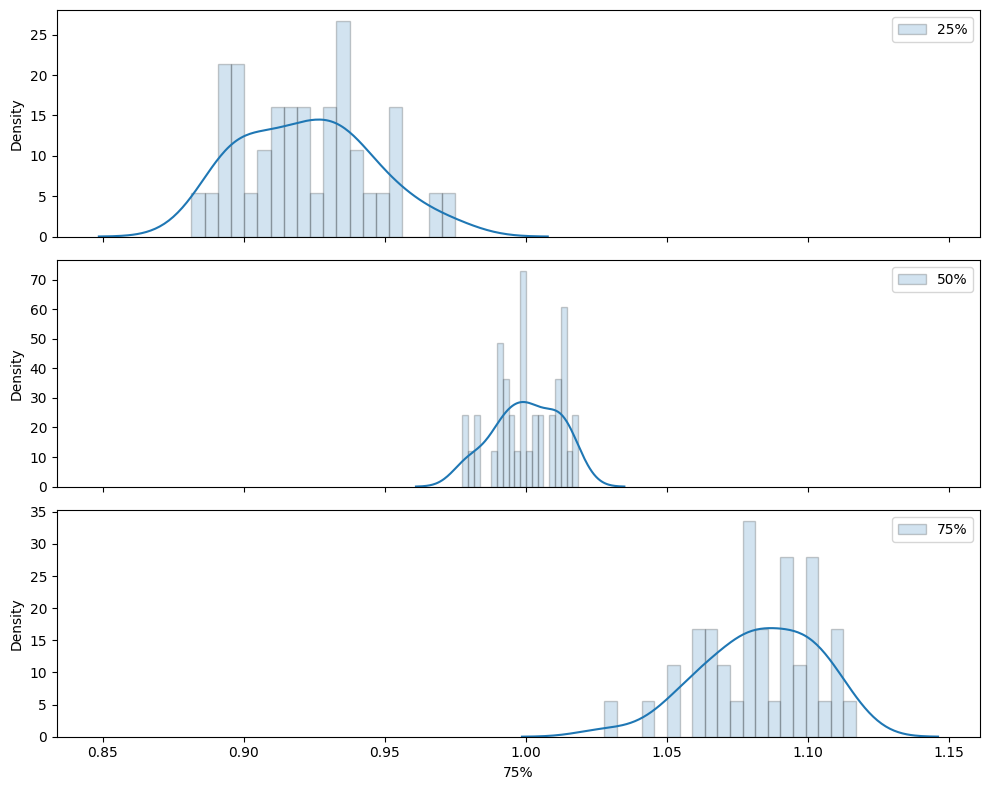

In [47]:
# visualization
hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10, 8), sharex=True)
sns.distplot(stats['25%'], bins=20, ax=ax[0], label='25%', hist_kws=hist_kws)
ax[0].legend(fontsize=10)
sns.distplot(stats['50%'], bins=20, ax=ax[1], label='50%', hist_kws=hist_kws)
ax[1].legend(fontsize=10)
sns.distplot(stats['75%'], bins=20, ax=ax[2], label='75%', hist_kws=hist_kws)
ax[2].legend(fontsize=10)
plt.tight_layout()
plt.show()